In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]
from matplotlib.pyplot import figure
%matplotlib inline

In [2]:
# read in the data frame 
df = pd.read_csv('distance_data.csv')
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df.info()
df.head(2)
# Filter by year
df = df[df['transaction_date'].dt.strftime('%Y') == '2022']

df_clean = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25366 entries, 0 to 25365
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tracking_number   25366 non-null  object        
 1   transaction_date  25366 non-null  datetime64[ns]
 2   service_code      25366 non-null  object        
 3   published_charge  25366 non-null  float64       
 4   incentive_charge  25366 non-null  float64       
 5   net_charge        25366 non-null  float64       
 6   ref_no_1          25345 non-null  object        
 7   billed_weight     25366 non-null  float64       
 8   package_quantity  25366 non-null  int64         
 9   zone              25366 non-null  float64       
 10  receiver_city     25366 non-null  object        
 11  receiver_state    25366 non-null  object        
 12  receiver_postal   25366 non-null  object        
 13  fuel_cost         25359 non-null  float64       
 14  detail_keyed_dim  2536

In [3]:
# Convert categorical to numeric representation of volume (in^3)

box_volume_map = {'15.0x 15.0x  6.0':1350,
'15.0x 15.0x 10.0':2250,
'14.0x 14.0x  4.0':784,
'14.0x  8.0x  4.0':448,
'14.0x 14.0x  6.0':1176,
'14.0x  8.0x  6.0':672,
'10.0x 10.0x  3.0':300,
'10.0x  8.0x  6.0':480,
'16.0x 16.0x  7.0':1792,
'15.0x 15.0x  8.0':1800,
'22.0x 18.0x 17.0':6732,
'21.0x 15.0x  6.0':1890,
'14.0x 10.0x  3.0':420,
'24.0x 16.0x  7.0':2688,
'12.0x  9.0x  2.0':216,
'15.0x 11.0x 10.0':1650,
'17.0x 17.0x 12.0':3468}

df['volume'] = df.detail_keyed_dim.map(box_volume_map)
df.head()

,tracking_number,transaction_date,service_code,published_charge,incentive_charge,net_charge,ref_no_1,billed_weight,package_quantity,zone,...,receiver_state,receiver_postal,fuel_cost,detail_keyed_dim,total_cost,adjustment,distance_mi,week_of_year,month,volume
0,1ZR4R346YW90778279,2022-12-01,UPS SurePost - 1 LB or Greater,19.07,-3.83,15.24,3166292,9.0,1,5.0,...,IL,60067,2.21,15.0x 15.0x 10.0,15.24,-0.0,1438.70,48,12,2250.0
1,1ZR4R346YW98621860,2022-12-01,UPS SurePost - 1 LB or Greater,17.80,-3.56,14.24,3166167,9.0,1,4.0,...,UT,84041,2.07,15.0x 15.0x 10.0,14.24,0.0,620.09,48,12,2250.0
2,1ZR4R346YW99277768,2022-12-01,UPS SurePost - 1 LB or Greater,13.79,-2.76,11.03,3166176,6.0,1,2.0,...,CO,80526,1.60,15.0x 15.0x 6.0,11.03,0.0,98.37,48,12,1350.0
3,1ZR4R346YW92620505,2022-12-01,UPS SurePost - 1 LB or Greater,15.17,-3.04,12.13,3166265,9.0,1,2.0,...,CO,80304,1.76,15.0x 15.0x 10.0,12.13,-0.0,52.06,48,12,2250.0
4,1ZR4R346YW93491091,2022-12-01,UPS SurePost - 1 LB or Greater,23.05,-3.83,19.22,3166263,9.0,1,5.0,...,MI,49337,2.79,15.0x 15.0x 10.0,19.22,0.0,1640.88,48,12,2250.0


In [4]:
# drop columns 

df_features = df[['net_charge', 'service_code', 'billed_weight', 'zone', 'fuel_cost', 'distance_mi', 'week_of_year', 'month', 'volume']]

In [5]:
# Copy of cleaned dataframe 

df_clean = df.copy()

In [6]:
# service encoding 
df_dummies = pd.get_dummies(data=df_features, drop_first=True)
df_dummies.head()

,net_charge,billed_weight,zone,fuel_cost,distance_mi,week_of_year,month,volume,service_code_Ground Commercial,service_code_Ground Residential,service_code_Ground Residential Collect,service_code_Ground Return to Sender,service_code_UPS SurePost - 1 LB or Greater
0,15.24,9.0,5.0,2.21,1438.70,48,12,2250.0,0,0,0,0,1
1,14.24,9.0,4.0,2.07,620.09,48,12,2250.0,0,0,0,0,1
2,11.03,6.0,2.0,1.60,98.37,48,12,1350.0,0,0,0,0,1
3,12.13,9.0,2.0,1.76,52.06,48,12,2250.0,0,0,0,0,1
4,19.22,9.0,5.0,2.79,1640.88,48,12,2250.0,0,0,0,0,1


In [7]:
df.service_code.value_counts()

UPS SurePost - 1 LB or Greater    21830
Ground Residential                    8
Ground Commercial                     5
Ground Residential Collect            4
Ground                                3
Ground Return to Sender               1
Name: service_code, dtype: int64

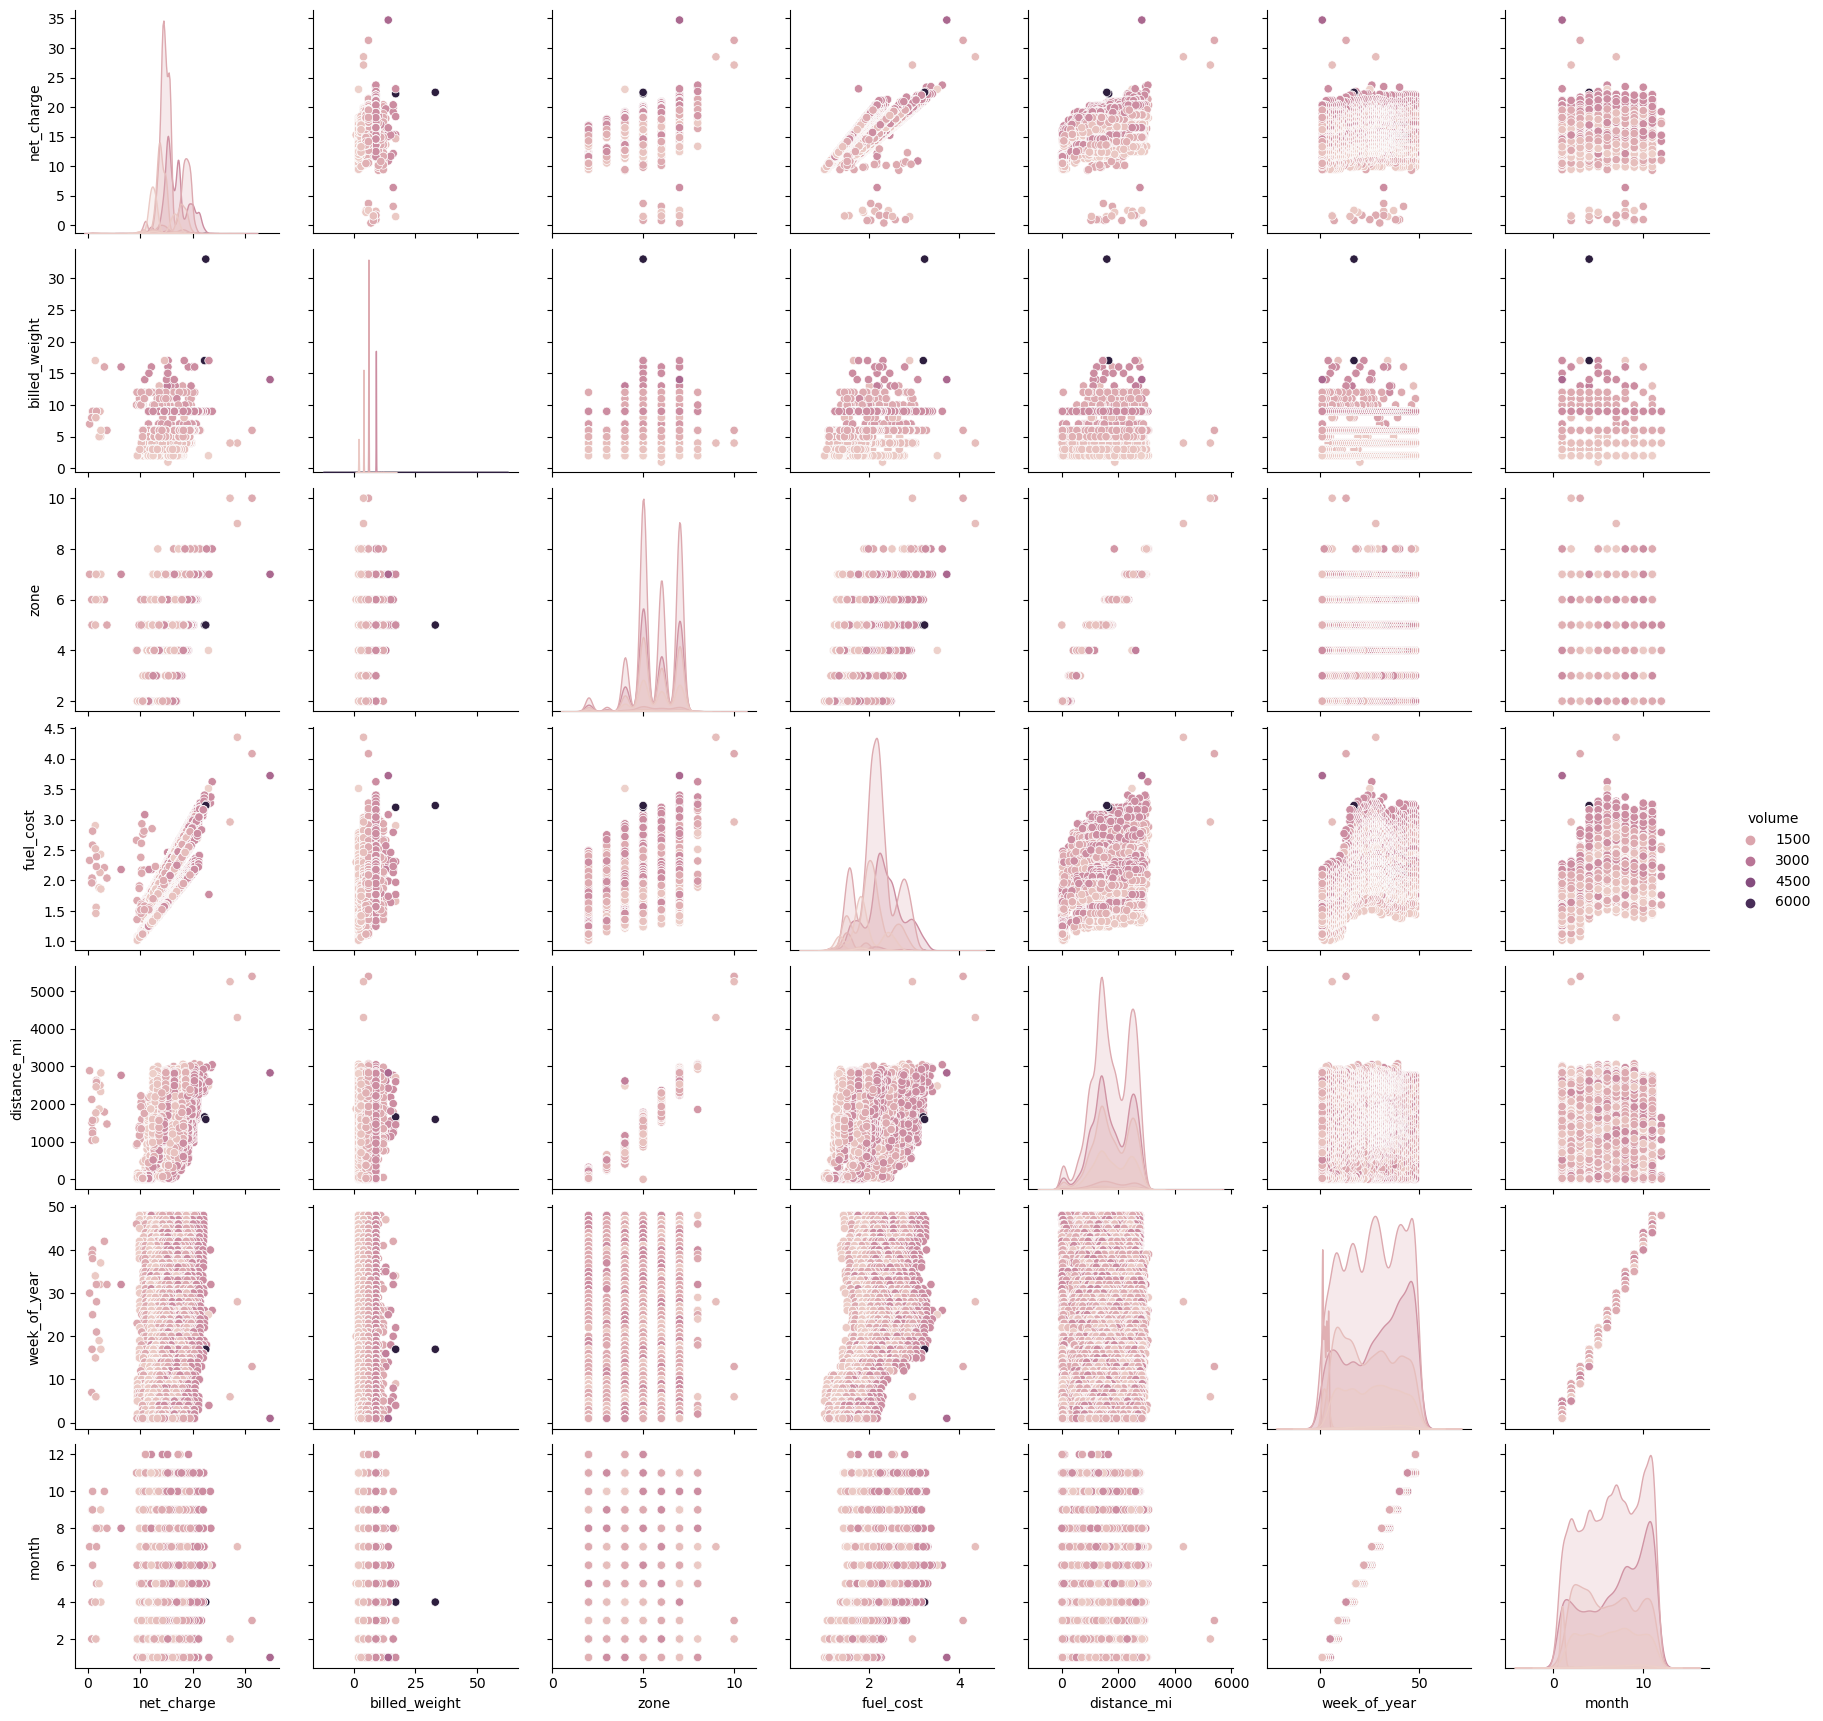

In [8]:
sns.pairplot(df_features, hue='volume');

In [9]:
# correlation matrix
df_features.corr()

,net_charge,billed_weight,zone,fuel_cost,distance_mi,week_of_year,month,volume
net_charge,1.000000,0.371466,0.336312,0.798466,0.302176,0.116547,0.116662,0.387970
billed_weight,0.371466,1.000000,-0.004285,0.324579,-0.015156,0.100335,0.099819,0.975380
zone,0.336312,-0.004285,1.000000,0.266243,0.961647,0.015105,0.014050,-0.004008
fuel_cost,0.798466,0.324579,0.266243,1.000000,0.230301,0.504712,0.506807,0.322519
distance_mi,0.302176,-0.015156,0.961647,0.230301,1.000000,-0.027186,-0.028183,-0.010231
week_of_year,0.116547,0.100335,0.015105,0.504712,-0.027186,1.000000,0.996068,0.109117
month,0.116662,0.099819,0.014050,0.506807,-0.028183,0.996068,1.000000,0.108349
volume,0.387970,0.975380,-0.004008,0.322519,-0.010231,0.109117,0.108349,1.000000


In [10]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# find design matrix for linear regression model 
y, X = dmatrices('net_charge ~ billed_weight + zone  + fuel_cost + distance_mi + week_of_year + month + volume', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
print(vif, "\n")
print("VIF scores over 10 should be dropped.")

          VIF       variable
0  104.527535      Intercept
1   20.507169  billed_weight
2   13.795959           zone
3    1.647873      fuel_cost
4   13.603426    distance_mi
5  125.111230   week_of_year
6  125.570922          month
7   20.450306         volume 

VIF scores over 10 should be dropped.


## Exploratory Data Analysis

15.0x 15.0x  6.0    9782
15.0x 15.0x 10.0    5199
14.0x 14.0x  4.0    3897
14.0x  8.0x  4.0    1949
14.0x 14.0x  6.0     470
14.0x  8.0x  6.0     195
16.0x 16.0x  7.0     139
10.0x 10.0x  3.0     111
10.0x  8.0x  6.0      45
16.0x 16.0x  6.0      45
29.0x 20.0x 17.0       3
15.0x 15.0x  8.0       2
25.0x 13.0x  2.0       2
22.0x 18.0x 17.0       2
21.0x 15.0x  6.0       1
24.0x 16.0x  7.0       1
15.0x 11.0x 10.0       1
12.0x  9.0x  2.0       1
14.0x 10.0x  3.0       1
19.0x 14.0x 10.0       1
10.0x 10.0x  2.0       1
27.0x 17.0x  5.0       1
12.0x 10.0x  9.0       1
17.0x 17.0x 12.0       1
Name: detail_keyed_dim, dtype: int64

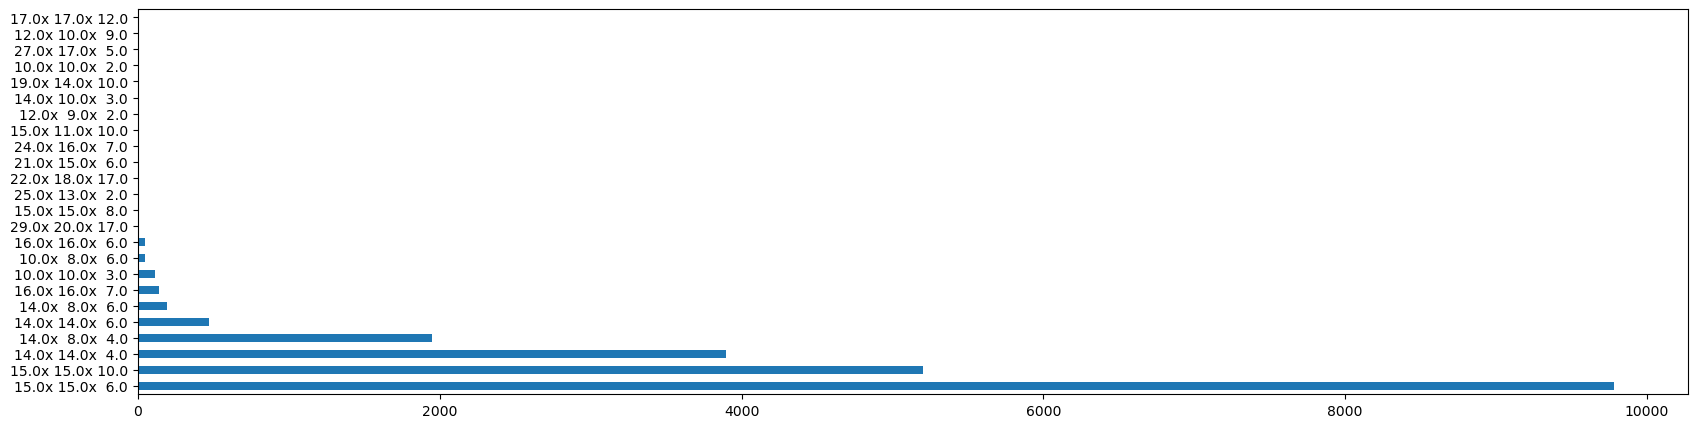

In [11]:
# Common Boxes for Analysis 

df['detail_keyed_dim'].value_counts().plot(kind='barh');
df['detail_keyed_dim'].value_counts()

6.0     9737
9.0     5194
4.0     3886
2.0     2099
5.0      475
3.0      195
7.0      142
10.0      31
12.0      28
11.0      20
8.0        9
16.0       7
17.0       6
13.0       6
14.0       5
15.0       4
48.0       3
1.0        2
19.0       1
33.0       1
Name: billed_weight, dtype: int64

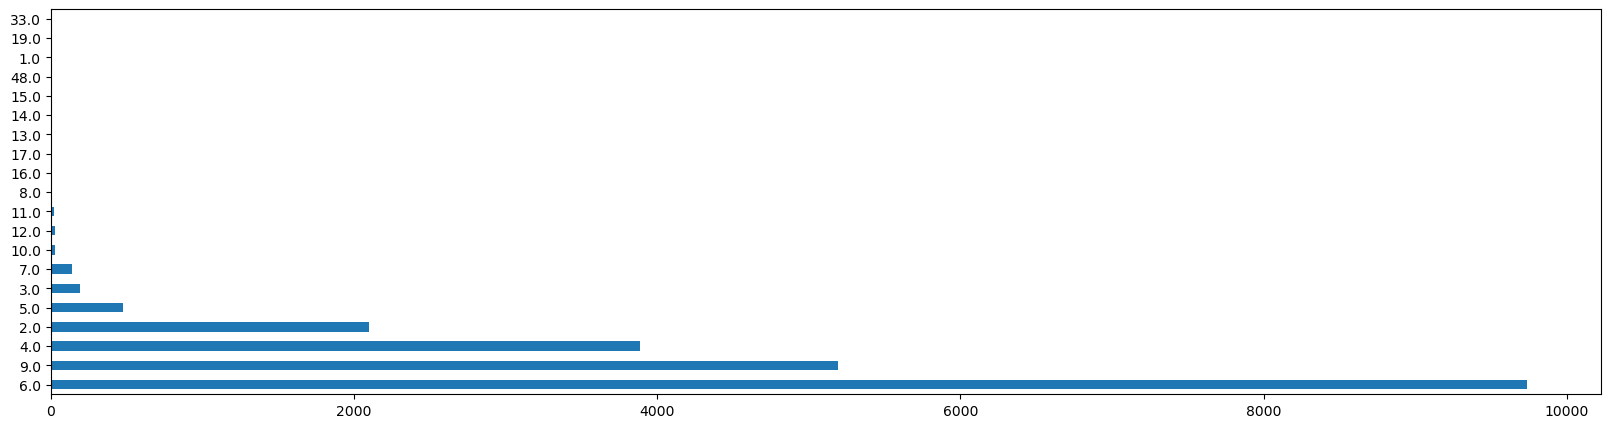

In [12]:
df['billed_weight'].value_counts().plot(kind='barh');
df['billed_weight'].value_counts()

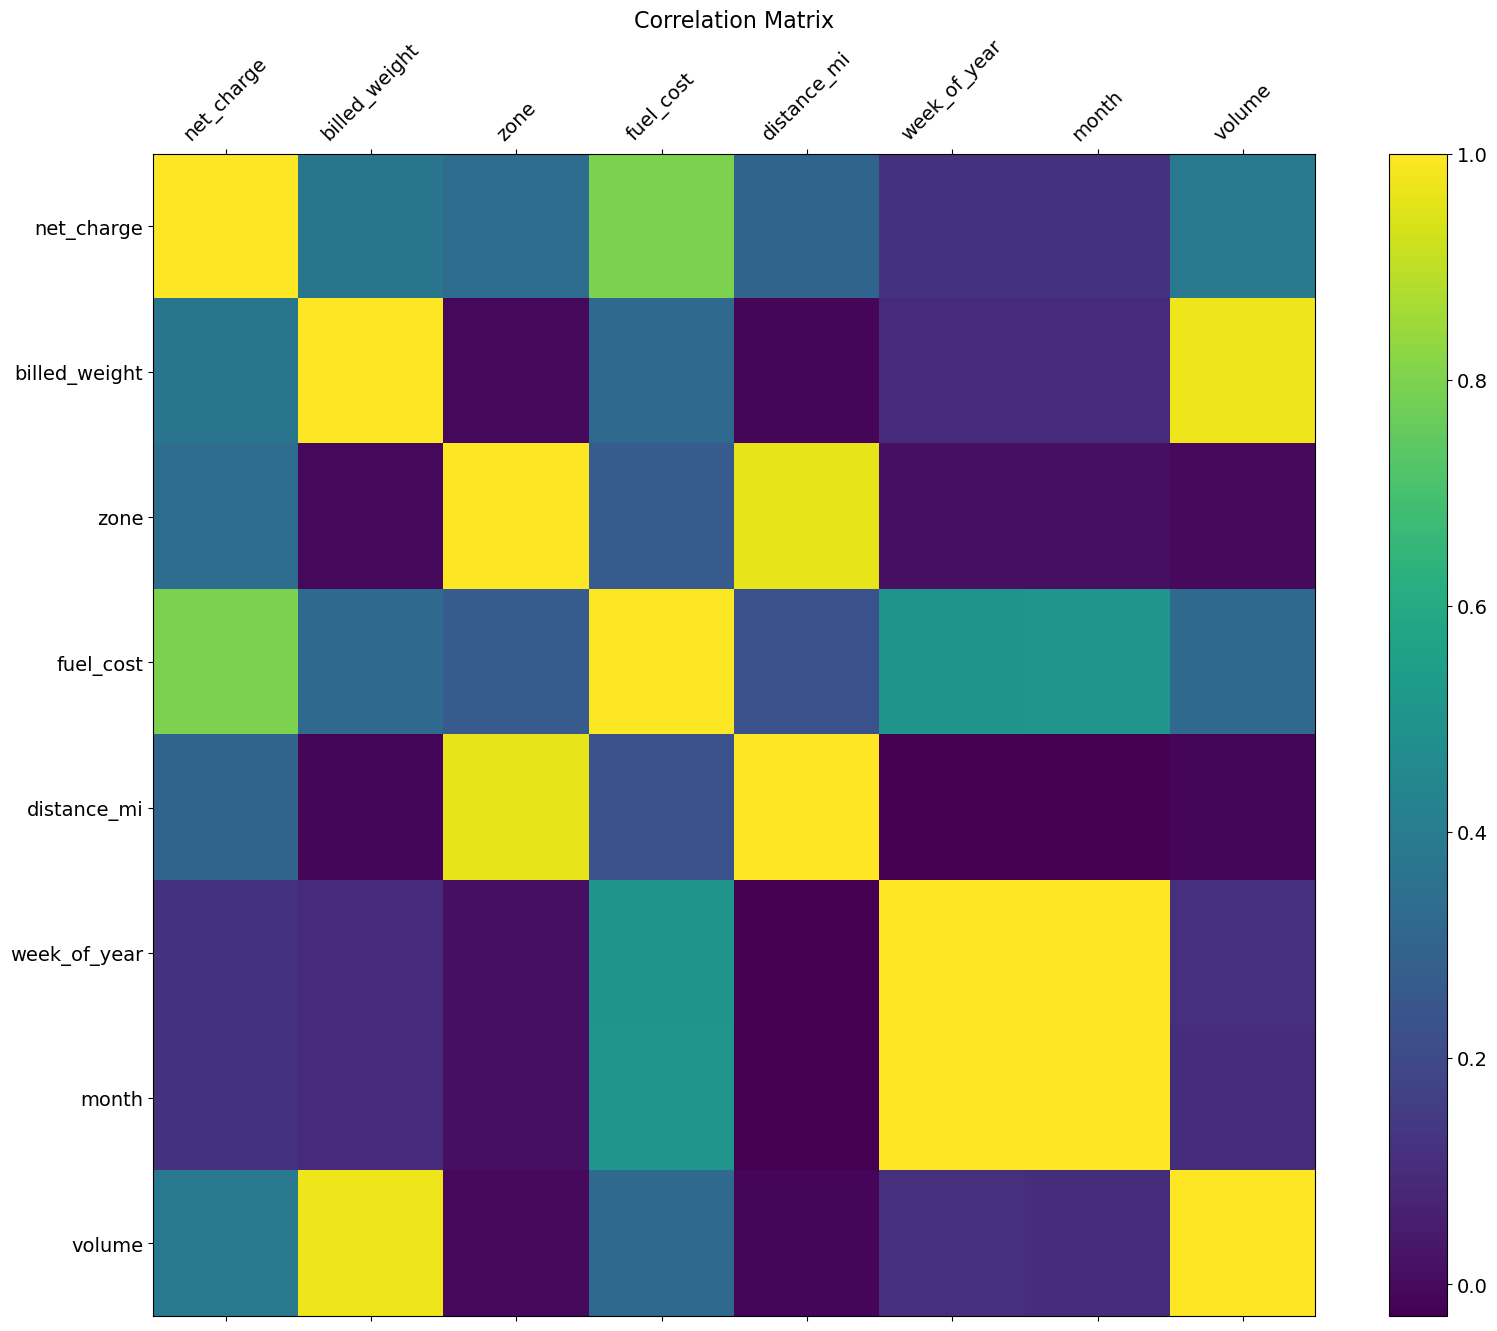

In [13]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_features.corr(), fignum=f.number)
plt.xticks(range(df_features.select_dtypes(['number']).shape[1]), df_features.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_features.select_dtypes(['number']).shape[1]), df_features.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# Filters

In [14]:
# Filter by Date 

df = df_clean.copy()

# Year
df = df[df['transaction_date'].dt.strftime('%Y') == '2022']

# Month
df = df[df['transaction_date'].dt.strftime('%m') >= '07']

# outliers 
#df = df[df['total_cost'] <= 60]

# adjustments
#df = df[df['adjustment'] <= 0]

# box_dim
#df = df[df['detail_keyed_dim'] == '15.0x 15.0x  6.0']

#zone 
df = df[df['zone'] <= 10.0]

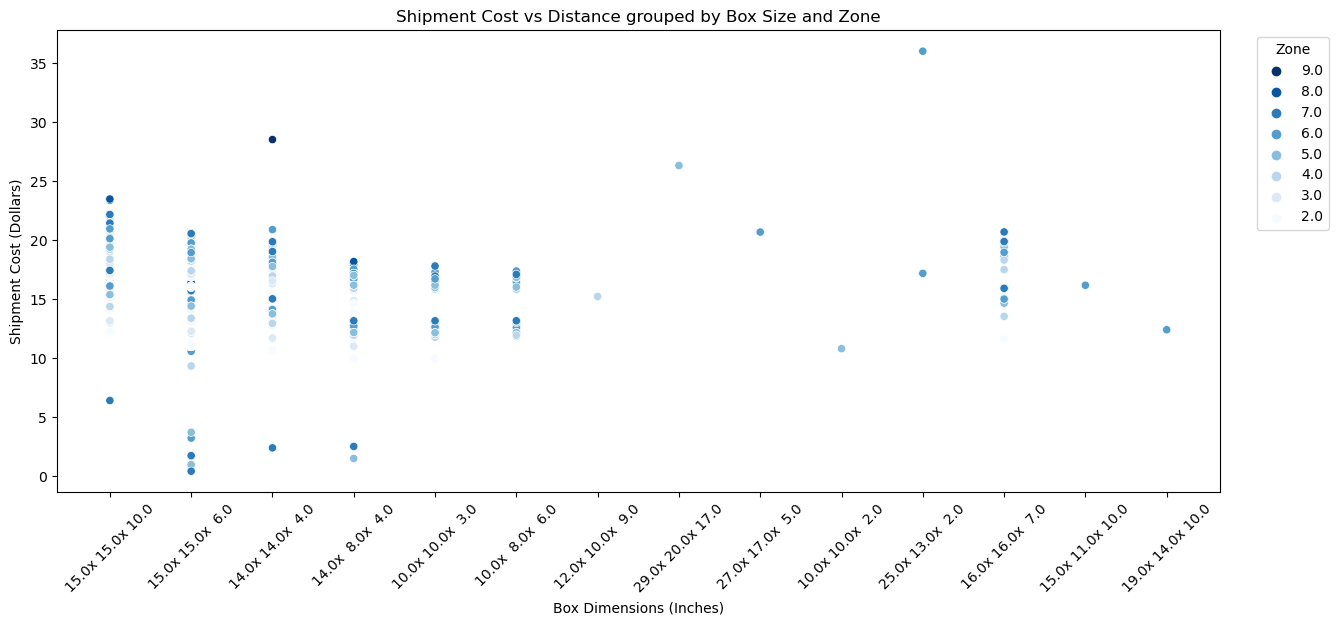

In [15]:
# Scatter Plot of total cost vs zone (distance) grouped by box size 

fig, ax = plt.subplots()
fig.set_size_inches(15, 6)

sns.scatterplot(
           data = df,
           x = 'detail_keyed_dim',
           y = 'net_charge',
           hue = 'zone',
           palette = 'Blues',
           legend = 'full',
           #order =box_frequency_order,
           ax = ax
               );

# reverse legend to show zone in decending order 
# https://stackoverflow.com/questions/34576059/reverse-the-order-of-a-legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title='Zone',loc='best', bbox_to_anchor=(.5, 0., .6, 1));

# rotate x axis 
# https://aihints.com/how-to-rotate-x-labels-in-seaborn/
ax.tick_params(axis='x', rotation=45)

# Add labels 
plt.title('Shipment Cost vs Distance grouped by Box Size and Zone')
plt.xlabel('Box Dimensions (Inches)')
plt.ylabel('Shipment Cost (Dollars)')


plt.show()

In [16]:
# Distance increases by zone 
df[['zone', 'fuel_cost', 'total_cost', 'distance_mi']].groupby('zone').mean().sort_values(['zone'],ascending=True)

,fuel_cost,total_cost,distance_mi
zone,,,
2.0,1.744176,12.024176,59.816973
3.0,2.203077,15.112436,411.290897
4.0,2.155576,14.888785,825.344638
5.0,2.229774,15.392605,1348.882498
6.0,2.347556,16.203689,1940.215990
7.0,2.406514,16.630345,2545.158681
8.0,2.832222,19.664444,3023.967500
9.0,4.350000,28.510000,4298.930000


In [17]:
# Subset the most commmon boxes to evaluate trends 
normal_billing_weight = ['15.0x 15.0x  6.0', '15.0x 15.0x 10.0', '14.0x 14.0x  4.0', '14.0x  8.0x  4.0' ]
df_common = df[df['detail_keyed_dim'].isin(normal_billing_weight)]

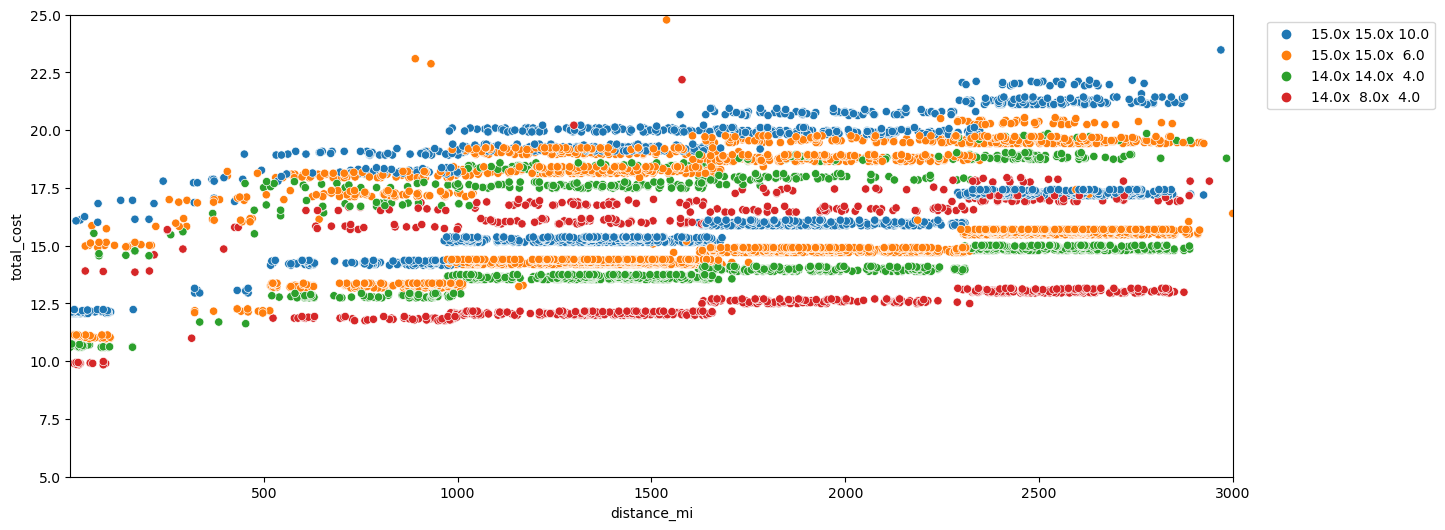

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)

sns.scatterplot(x='distance_mi',
               y = 'total_cost',
               hue = 'detail_keyed_dim',
               data = df_common,
               ax = ax)

ax.set_xlim(1,3000)
ax.set_ylim(5,25)
plt.legend(loc='best', bbox_to_anchor=(.58, 0., .6, 1));

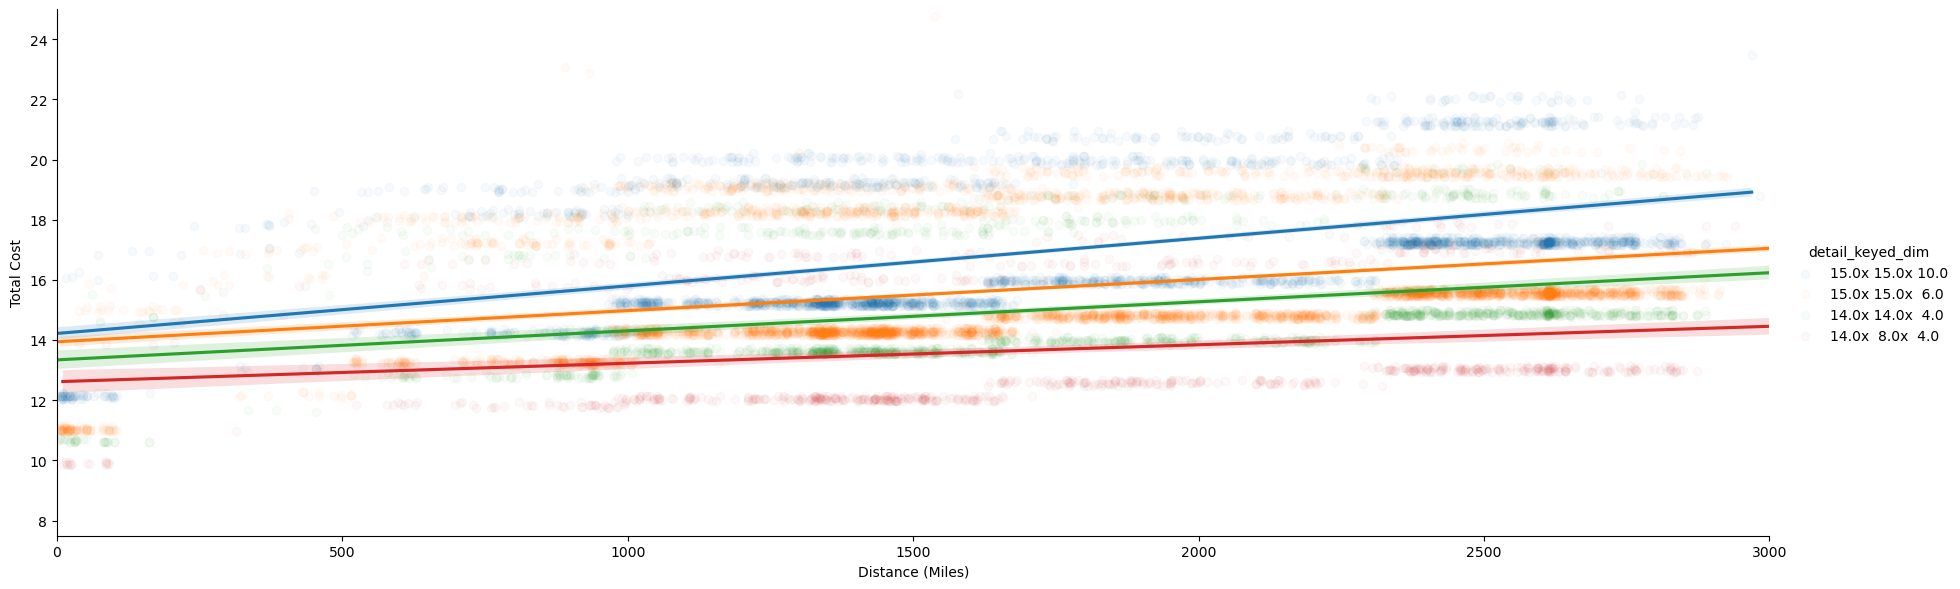

In [19]:
# https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

g = sns.lmplot(
    data=df_common,
    x="distance_mi",
    y="total_cost",
    hue="detail_keyed_dim",
    height= 6,
    aspect= 3,
    scatter_kws={'alpha':0.03}
);

g = (g.set_axis_labels("Distance (Miles)", "Total Cost")
      .set(xlim=(0, 3000), ylim=(7.5, 25))
      .fig.subplots_adjust(wspace=.02))

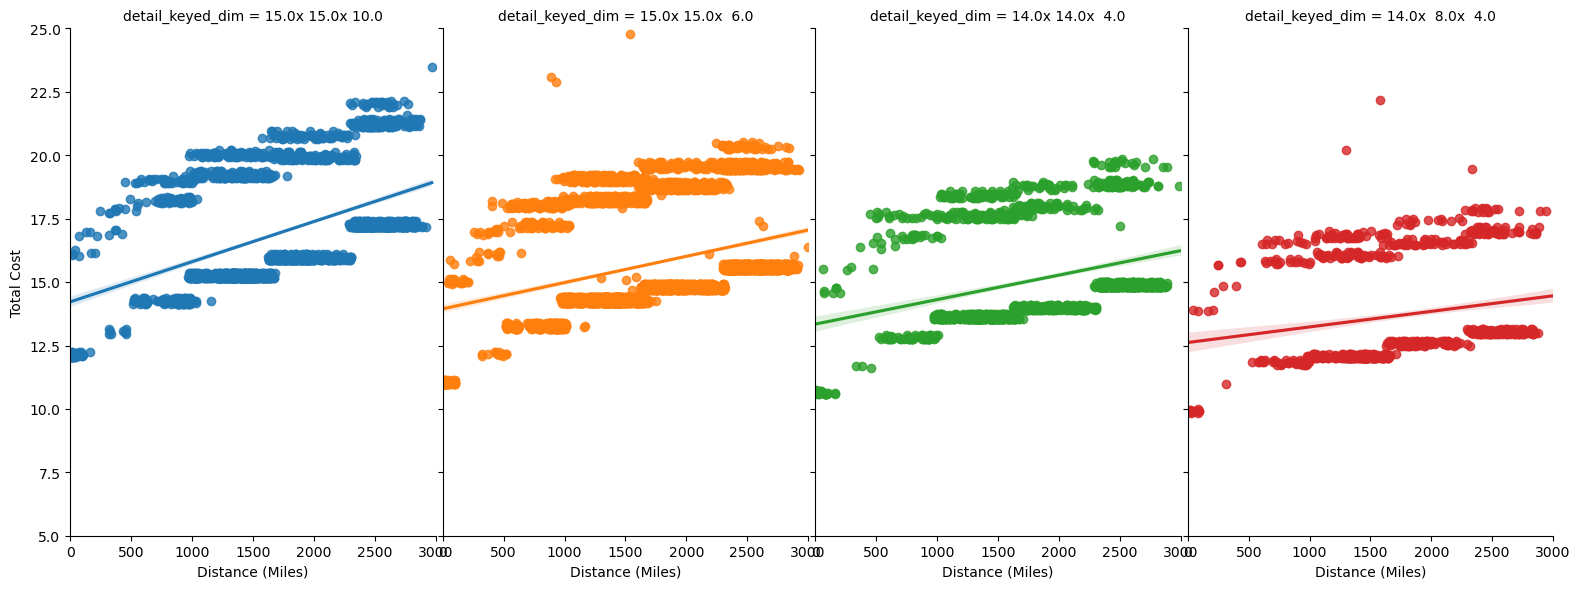

In [20]:
# https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot

g = sns.lmplot(x="distance_mi", y="total_cost", col="detail_keyed_dim", hue="detail_keyed_dim",

               data=df_common, height=6, aspect=.65, x_jitter=.1)


g = (g.set_axis_labels("Distance (Miles)", "Total Cost")

      .set(xlim=(0, 3000), ylim=(5, 25))

      .fig.subplots_adjust(wspace=.02))

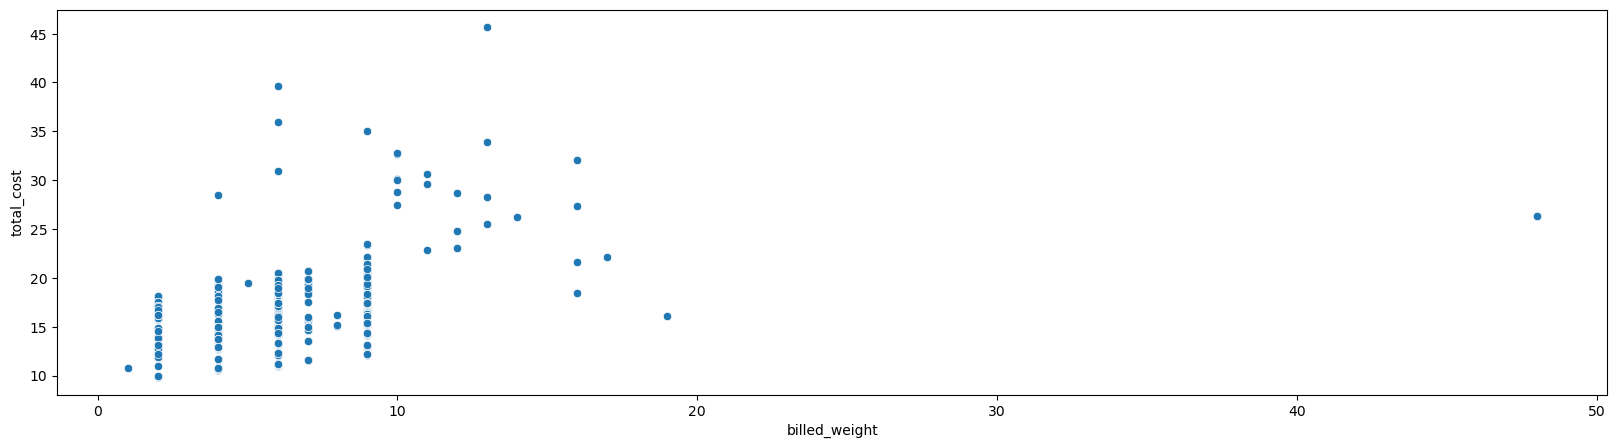

In [21]:
sns.scatterplot(x='billed_weight',
               y = 'total_cost',
                data = df);

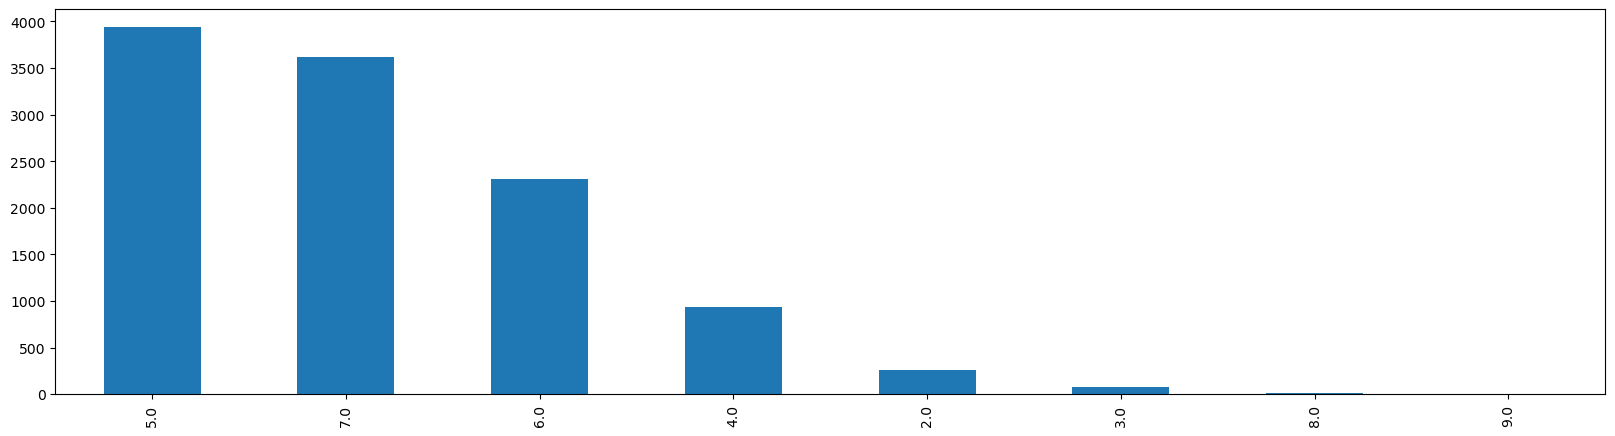

In [22]:
df['zone'].value_counts().plot(kind='bar');

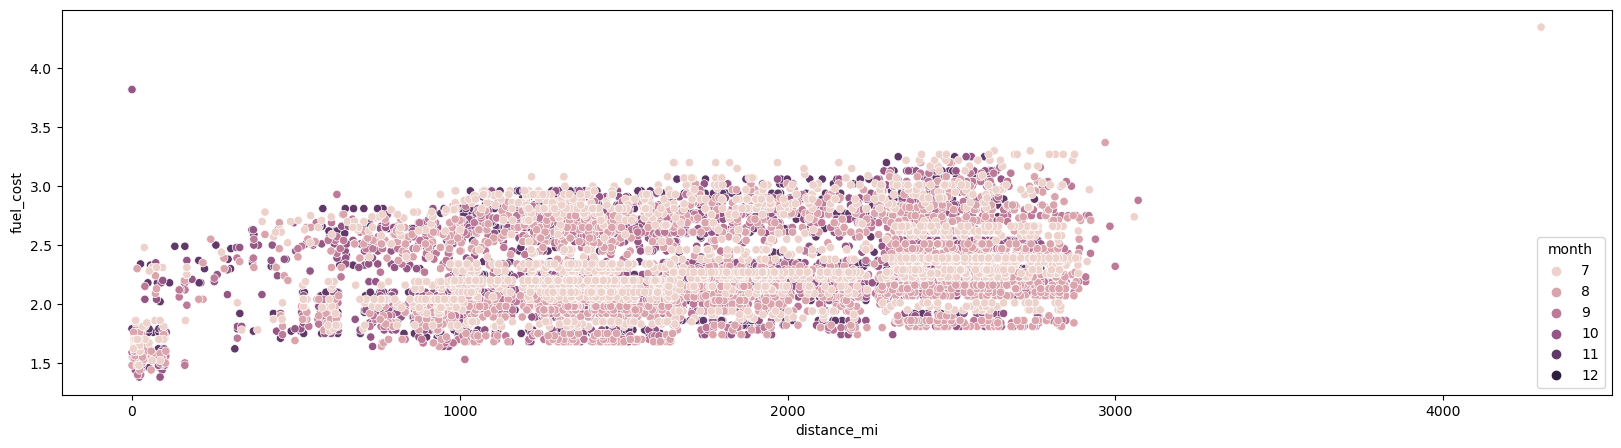

In [23]:
g = sns.scatterplot(x='distance_mi',
               y = 'fuel_cost',
                hue='month',
                data = df);

# g = g.set_axis_labels("Fuel Charge (Dollars)", "Total Shipment Cost (Dollars)")

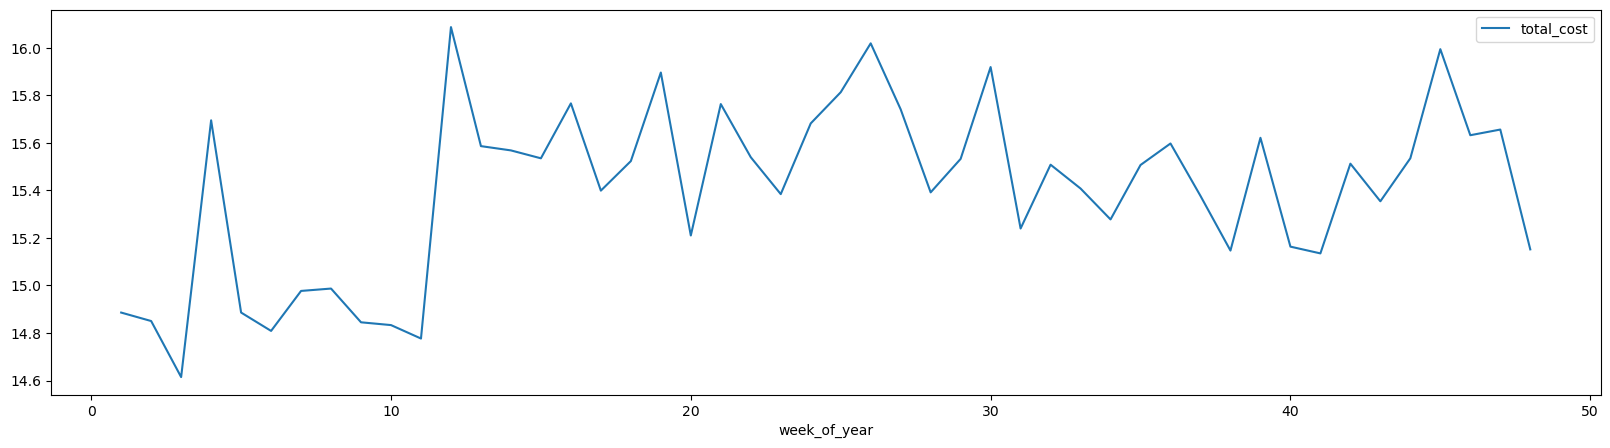

In [24]:
# total cost vs week of year (constrained) 

# Filter by Date 
df = df_clean.copy()

# Year
df = df[df['transaction_date'].dt.strftime('%Y') == '2022']

# Month
#df = df[df['transaction_date'].dt.strftime('%m') == '07']

# outliers 
df = df[df['total_cost'] <= 60]

# adjustments
df = df[df['adjustment'] <= 0]

# box_dim
df = df[df['detail_keyed_dim'] == '15.0x 15.0x  6.0']

#zone 
df = df[df['zone'] == 5.0]

#plot line of constrained 
df[['total_cost', 'week_of_year']].groupby(by='week_of_year').mean().plot(kind='line');

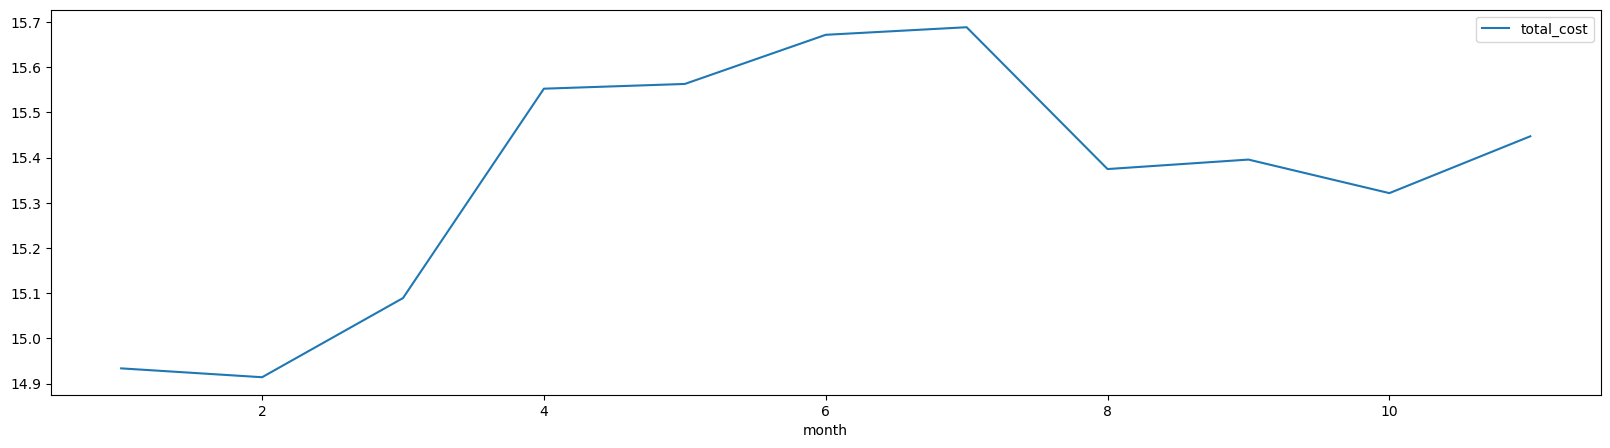

In [25]:
# total cost by month constrained 
df[['total_cost', 'month']].groupby(by='month').mean().plot(kind='line');

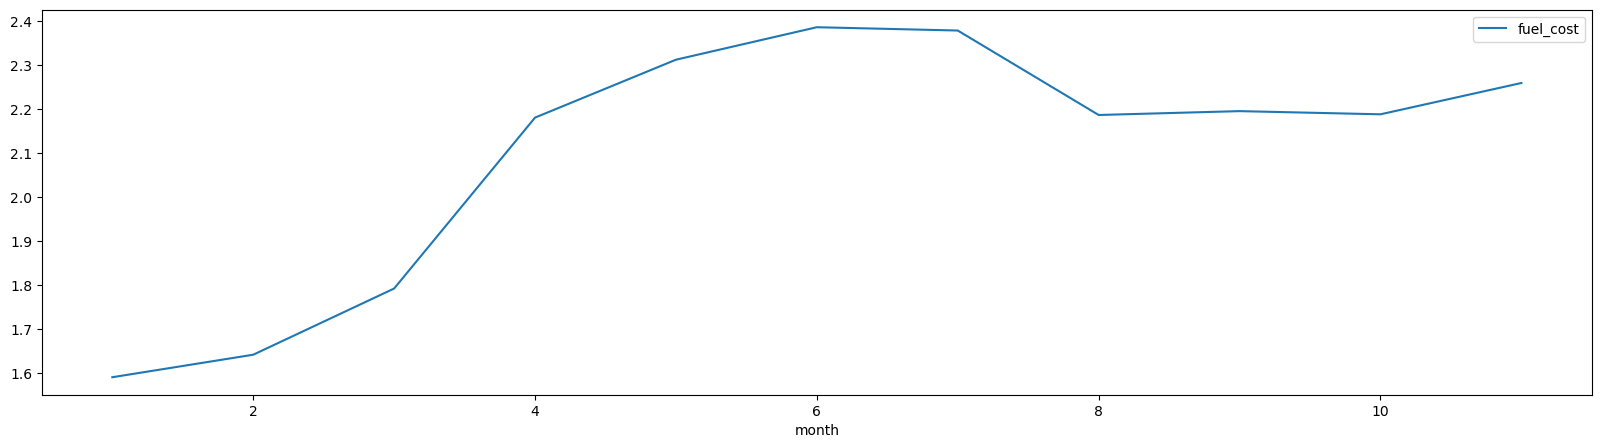

In [26]:
# fuel cost by month constrained 
df[['fuel_cost', 'month']].groupby(by='month').mean().plot(kind='line');

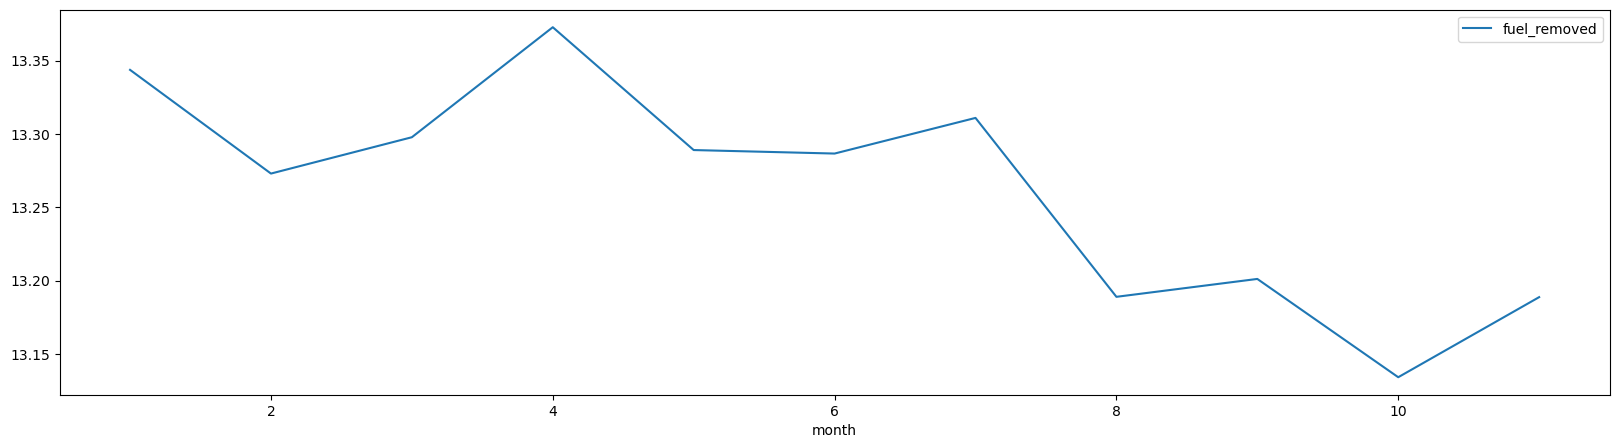

In [27]:
# remove fuel cost from total cost to determine base rate over time 
df['fuel_removed'] = df['total_cost']-df['fuel_cost']
df[['fuel_removed', 'month']].groupby(by='month').mean().plot(kind='line');

# revert df to full 
df = df_clean.copy()

# Outliers

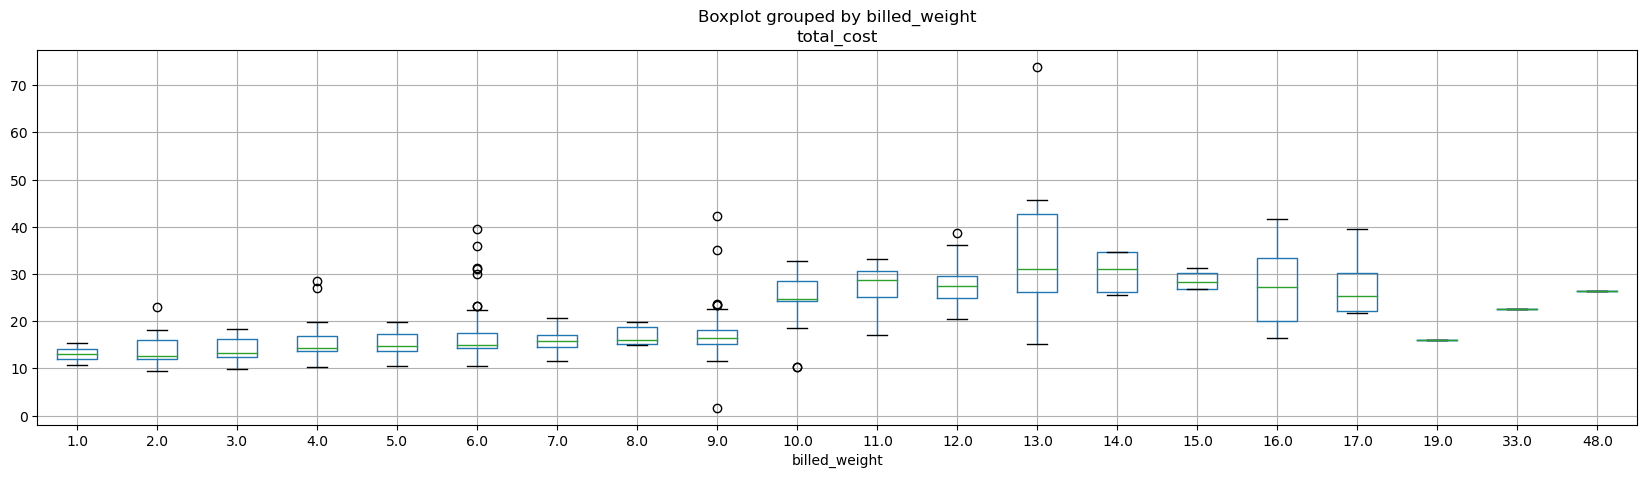

In [28]:
plt.rcParams['figure.figsize'] = [20, 5]
df.boxplot(column=['total_cost'], by ='billed_weight');

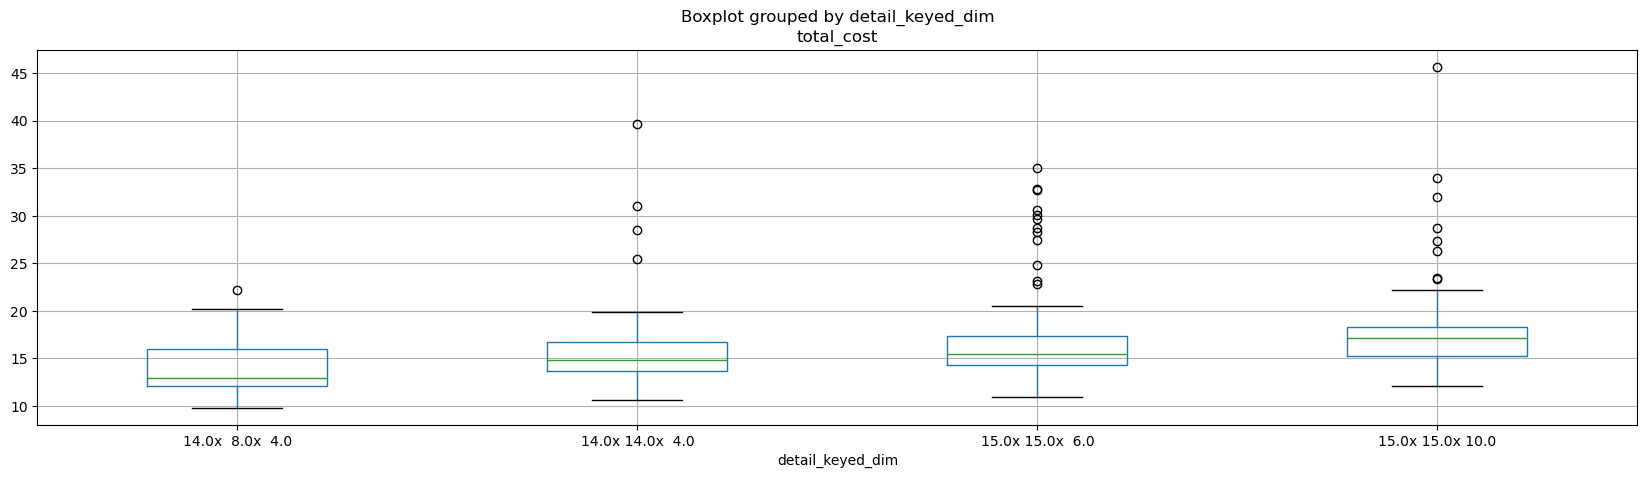

In [29]:
df_common.boxplot(column=['total_cost'], by ='detail_keyed_dim');

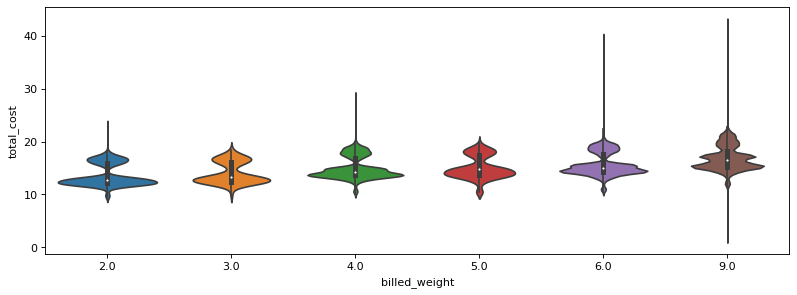

In [30]:
# Normal UPS Shipments
normal_billing_weight = [2.0, 3.0, 4.0, 5.0, 6.0, 9.0]

df_common_weight = df[df['billed_weight'].isin(normal_billing_weight)]
figure(figsize=(12, 4), dpi=80);
ax = sns.violinplot(x="billed_weight", y="total_cost", data = df_common_weight)

In [31]:
df[['receiver_state', 'zone', 'fuel_cost', 'total_cost', 'distance_mi']].groupby('receiver_state').mean().sort_values(['distance_mi'],ascending=True)

,zone,fuel_cost,total_cost,distance_mi
receiver_state,,,,
CO,2.098299,1.658998,12.163497,74.085974
WY,2.854545,2.132000,15.756182,384.914727
NM,3.695652,2.046304,15.030000,570.463551
UT,4.000000,1.889027,14.133891,614.673541
NE,3.921569,2.065359,15.150588,682.486405
SD,3.679245,2.022830,14.901887,705.683019
KS,3.929487,2.040064,14.741090,765.006795
OK,4.037234,2.104415,15.469734,834.208936
AZ,4.000000,1.921291,14.000451,940.196591
